In [5]:
import pandas as pd
import numpy as np


In [6]:
df = pd.read_csv('/content/Time_series_analysis_and_forecast_DATASET.csv')
df

,FullDate,Tmax,SysLoad,GasPrice,ElecPrice
0,2010-09-01 00:00:00,15.8,1688.21500,3.6900,23.710
1,2010-09-01 01:00:00,15.8,1669.19500,3.6900,22.635
2,2010-09-01 02:00:00,15.8,1491.98000,3.6900,22.565
3,2010-09-01 03:00:00,15.8,1330.76000,3.6900,18.910
4,2010-09-01 04:00:00,15.8,1247.94000,3.6900,18.030
...,...,...,...,...,...
92011,2021-02-28 19:00:00,24.3,449.63625,5.4848,117.925
92012,2021-02-28 20:00:00,24.3,815.59975,5.4848,87.880
92013,2021-02-28 21:00:00,24.3,745.12325,5.4848,62.060
92014,2021-02-28 22:00:00,24.3,694.95150,5.4848,62.000


In [7]:
#check for missing values
df.isnull().sum()

FullDate     0
Tmax         0
SysLoad      0
GasPrice     0
ElecPrice    0
dtype: int64

In [8]:
#check the data types
df.dtypes

FullDate      object
Tmax         float64
SysLoad      float64
GasPrice     float64
ElecPrice    float64
dtype: object

In [9]:
#change fulldate column to datetime
df['FullDate'] = pd.to_datetime(df['FullDate'])

In [10]:
#check for duplicates
df.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
92011    False
92012    False
92013    False
92014    False
92015    False
Length: 92016, dtype: bool

In [11]:
df.set_index('FullDate',inplace = True)

In [12]:
df

,Tmax,SysLoad,GasPrice,ElecPrice
FullDate,,,,
2010-09-01 00:00:00,15.8,1688.21500,3.6900,23.710
2010-09-01 01:00:00,15.8,1669.19500,3.6900,22.635
2010-09-01 02:00:00,15.8,1491.98000,3.6900,22.565
2010-09-01 03:00:00,15.8,1330.76000,3.6900,18.910
2010-09-01 04:00:00,15.8,1247.94000,3.6900,18.030
...,...,...,...,...
2021-02-28 19:00:00,24.3,449.63625,5.4848,117.925
2021-02-28 20:00:00,24.3,815.59975,5.4848,87.880
2021-02-28 21:00:00,24.3,745.12325,5.4848,62.060


In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(rc={'figure.figsize':(11, 4)})

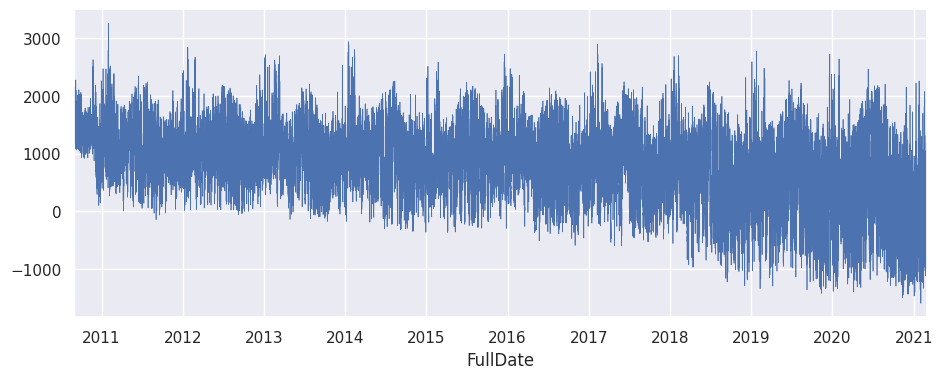

In [14]:
df['SysLoad'].plot(linewidth=0.5);

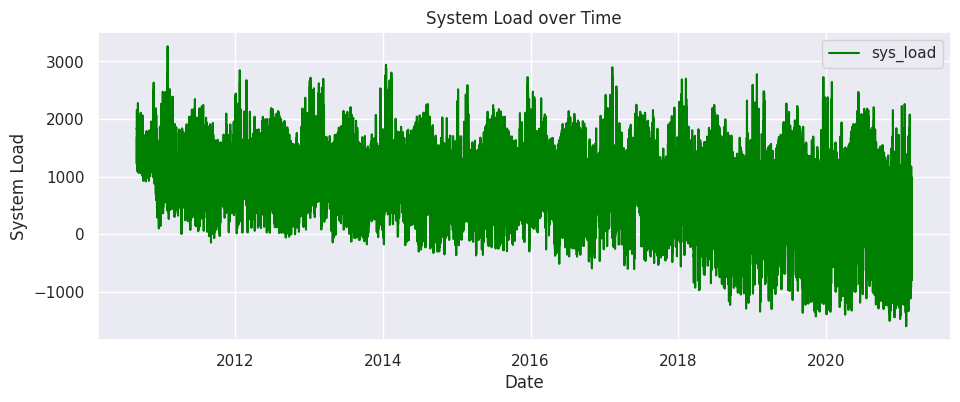

In [15]:
plt.plot(df.index, df['SysLoad'], label='sys_load', color='green')
plt.xlabel('Date')
plt.ylabel('System Load')
plt.title('System Load over Time')
plt.legend()
plt.show()

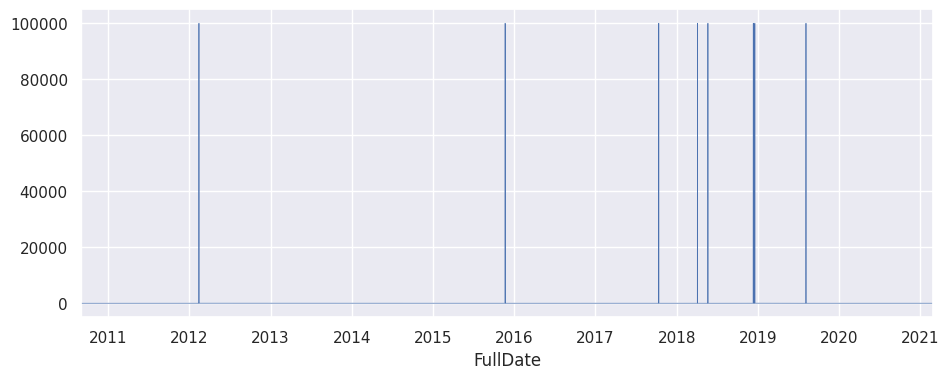

In [16]:
df['Tmax'].plot(linewidth=0.5);

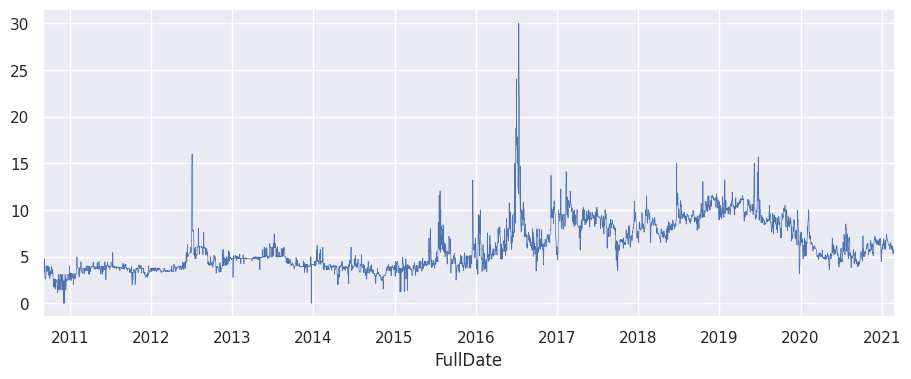

In [17]:
df['GasPrice'].plot(linewidth=0.5);

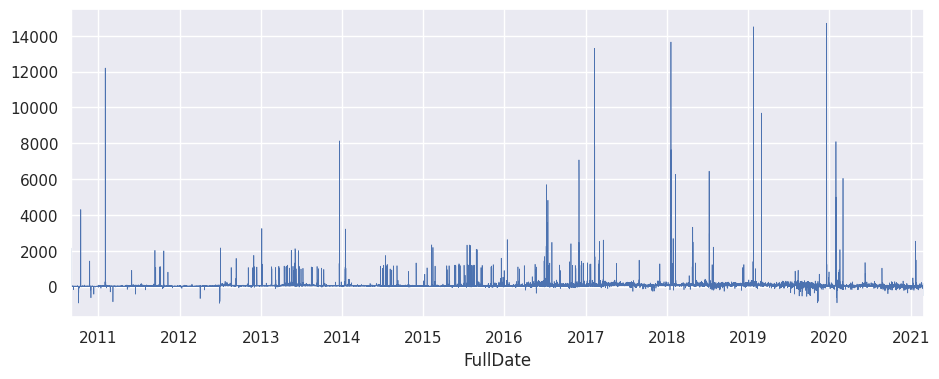

In [18]:
df['ElecPrice'].plot(linewidth=0.5);

In [19]:
#drop column for question 14 to 16
df1 = df.drop(columns = ['Tmax','SysLoad','GasPrice'])
df1

,ElecPrice
FullDate,
2010-09-01 00:00:00,23.710
2010-09-01 01:00:00,22.635
2010-09-01 02:00:00,22.565
2010-09-01 03:00:00,18.910
2010-09-01 04:00:00,18.030
...,...
2021-02-28 19:00:00,117.925
2021-02-28 20:00:00,87.880
2021-02-28 21:00:00,62.060


In [20]:
#downsize the sampling size to daily
df1_daily = df1.resample('D').sum()
df1_daily

,ElecPrice
FullDate,
2010-09-01,2751.700
2010-09-02,570.810
2010-09-03,504.975
2010-09-04,502.275
2010-09-05,500.555
...,...
2021-02-24,634.770
2021-02-25,577.515
2021-02-26,1445.495


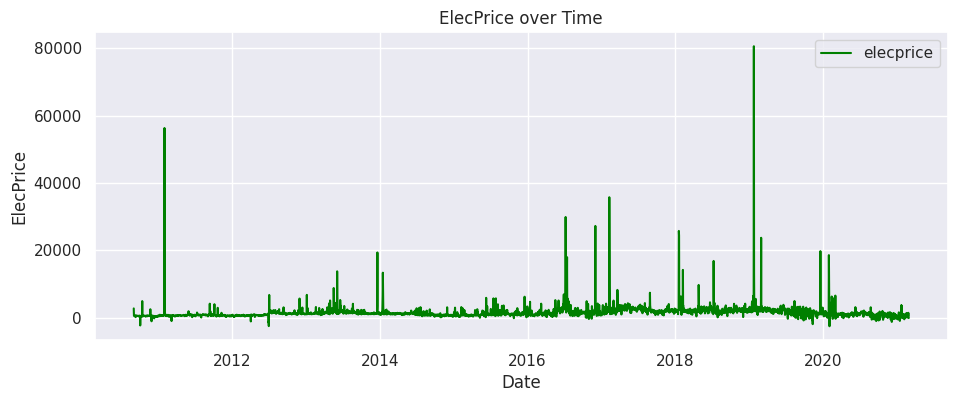

In [21]:
#Resample the data from an hour sampling rate to a daily sampling rate (i.e sum over the hours for each day). Which of the following is a plot of ElecPrice over time?
plt.plot(df1_daily.index, df1_daily['ElecPrice'], label='elecprice', color='green')
plt.xlabel('Date')
plt.ylabel('ElecPrice')
plt.title('ElecPrice over Time')
plt.legend()
plt.show()

In [22]:
#calling a new variable df4 to answer question 12 and 13
df4 = df
df4

,Tmax,SysLoad,GasPrice,ElecPrice
FullDate,,,,
2010-09-01 00:00:00,15.8,1688.21500,3.6900,23.710
2010-09-01 01:00:00,15.8,1669.19500,3.6900,22.635
2010-09-01 02:00:00,15.8,1491.98000,3.6900,22.565
2010-09-01 03:00:00,15.8,1330.76000,3.6900,18.910
2010-09-01 04:00:00,15.8,1247.94000,3.6900,18.030
...,...,...,...,...
2021-02-28 19:00:00,24.3,449.63625,5.4848,117.925
2021-02-28 20:00:00,24.3,815.59975,5.4848,87.880
2021-02-28 21:00:00,24.3,745.12325,5.4848,62.060


In [23]:
df4_daily = df4.resample('D').sum()
df4_daily

,Tmax,SysLoad,GasPrice,ElecPrice
FullDate,,,,
2010-09-01,379.2,41565.38000,88.5600,2751.700
2010-09-02,369.6,38898.99000,88.5600,570.810
2010-09-03,439.2,41665.76000,106.8000,504.975
2010-09-04,328.8,35638.08500,81.3600,502.275
2010-09-05,357.6,35611.41000,106.8000,500.555
...,...,...,...,...
2021-02-24,537.6,-1525.49745,134.4000,634.770
2021-02-25,518.4,4539.07855,130.5048,577.515
2021-02-26,547.2,9517.02430,130.1808,1445.495


In [24]:
#Using the Augmented Dicky Fuller test (ADF), what is the P-value of the SysLoad and GasPrice of the resampled Data set, to 6 decimal places?
from statsmodels.tsa.stattools import adfuller

# Performing ADF test for 'SysLoad'
result_sysload = adfuller(df4_daily['SysLoad'])
p_value_sysload = result_sysload[1]

# Performing ADF test for 'GasPrice'
result_gasprice = adfuller(df4_daily['GasPrice'])
p_value_gasprice = result_gasprice[1]

# Printing the p-values to 6 decimal places
print("P-value for SysLoad:", round(p_value_sysload, 6))
print("P-value for GasPrice:", round(p_value_gasprice, 6))


P-value for SysLoad: 0.004254
P-value for GasPrice: 0.045027


In [25]:
#Using the Augmented Dicky Fuller test (ADF) what are the 10% and 5% critical values of GasPrice and ElecPrice of the resampled Data set, to 4 decimal places?
# Assuming 'df1_daily' is the DataFrame with the resampled daily data
# and 'GasPrice' and 'ElecPrice' are the columns of interest

# Performing ADF test for 'GasPrice'
result_gasprice = adfuller(df4_daily['GasPrice'])
critical_values_gasprice = result_gasprice[4]

# Performing ADF test for 'ElecPrice'
result_elecprice = adfuller(df4_daily['ElecPrice'])
critical_values_elecprice = result_elecprice[4]

# Printing the 10% and 5% critical values to 4 decimal places
print("10% Critical Values for GasPrice:", round(critical_values_gasprice['10%'], 4))
print("5% Critical Values for GasPrice:", round(critical_values_gasprice['5%'], 4))

print("10% Critical Values for ElecPrice:", round(critical_values_elecprice['10%'], 4))
print("5% Critical Values for ElecPrice:", round(critical_values_elecprice['5%'], 4))


10% Critical Values for GasPrice: -2.5672
5% Critical Values for GasPrice: -2.8623
10% Critical Values for ElecPrice: -2.5672
5% Critical Values for ElecPrice: -2.8623


In [26]:
#Evaluating the results of your time series model on the test set, what is the MAPE (in %) in 2 decimal places?

#Hint:

#Define a function that calculates the Mape using the definition of MAPE from the course Module and pass your dataset into it.


In [27]:
#note that df1 is what we are using as we have removed the tmax, gasprice and sysload column
# Split the data into a train and test set
train = df1_daily[0:2757]
test = df1_daily[2757:]

In [28]:
test.reset_index(inplace=True)
test.rename(columns={'FullDate': 'ds', 'ElecPrice': 'y'}, inplace=True)
test



<ipython-input-28-22580e827c33>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test.rename(columns={'FullDate': 'ds', 'ElecPrice': 'y'}, inplace=True)


,ds,y
0,2018-03-20,1833.000
1,2018-03-21,1730.490
2,2018-03-22,2260.550
3,2018-03-23,2138.760
4,2018-03-24,1721.700
...,...,...
1072,2021-02-24,634.770
1073,2021-02-25,577.515
1074,2021-02-26,1445.495
1075,2021-02-27,488.980


In [29]:
pip install prophet


In [30]:
from prophet import Prophet

In [31]:
# Prophet requires specific column names 'ds' and 'y'
train.reset_index(inplace=True)
train.rename(columns={'FullDate': 'ds', 'ElecPrice': 'y'}, inplace=True)


<ipython-input-31-c4208d6b8c02>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train.rename(columns={'FullDate': 'ds', 'ElecPrice': 'y'}, inplace=True)


In [32]:
model = Prophet()
model.fit(train)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpt0sgzjzd/km7tnznf.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpt0sgzjzd/rqx9dg2b.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=96174', 'data', 'file=/tmp/tmpt0sgzjzd/km7tnznf.json', 'init=/tmp/tmpt0sgzjzd/rqx9dg2b.json', 'output', 'file=/tmp/tmpt0sgzjzd/prophet_modelnm1sub32/prophet_model-20230727183352.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:33:52 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:33:52 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [33]:
#creating a dataframe for the ds column and calling it test_date
test_date = pd.DataFrame(test['ds'])


In [35]:
# Make predictions for the test set
forecast = model.predict(test_date)
forecast



,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2018-03-20,2684.522366,178.211258,4957.690821,2684.522366,2684.522366,-157.277098,-157.277098,-157.277098,9.755659,9.755659,9.755659,-167.032757,-167.032757,-167.032757,0.0,0.0,0.0,2527.245268
1,2018-03-21,2685.313840,286.990468,5008.774827,2685.313840,2685.313840,-4.693954,-4.693954,-4.693954,159.421504,159.421504,159.421504,-164.115459,-164.115459,-164.115459,0.0,0.0,0.0,2680.619886
2,2018-03-22,2686.105314,519.099186,5114.477383,2686.105314,2686.105314,93.604040,93.604040,93.604040,257.239178,257.239178,257.239178,-163.635138,-163.635138,-163.635138,0.0,0.0,0.0,2779.709354
3,2018-03-23,2686.896788,252.666524,4938.855797,2686.896788,2686.896788,-115.130706,-115.130706,-115.130706,50.294929,50.294929,50.294929,-165.425635,-165.425635,-165.425635,0.0,0.0,0.0,2571.766082
4,2018-03-24,2687.688263,-80.923980,4586.301498,2687.688263,2687.688263,-440.838320,-440.838320,-440.838320,-271.594004,-271.594004,-271.594004,-169.244315,-169.244315,-169.244315,0.0,0.0,0.0,2246.849943
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1072,2021-02-24,3532.982694,375.425899,6414.025771,1745.827744,5177.485048,-93.658115,-93.658115,-93.658115,159.421504,159.421504,159.421504,-253.079620,-253.079620,-253.079620,0.0,0.0,0.0,3439.324579
1073,2021-02-25,3533.774169,492.711913,6447.369115,1744.655637,5180.448802,-27.430769,-27.430769,-27.430769,257.239178,257.239178,257.239178,-284.669947,-284.669947,-284.669947,0.0,0.0,0.0,3506.343399
1074,2021-02-26,3534.565643,117.418190,6255.098864,1743.483530,5183.348826,-261.422468,-261.422468,-261.422468,50.294929,50.294929,50.294929,-311.717397,-311.717397,-311.717397,0.0,0.0,0.0,3273.143175
1075,2021-02-27,3535.357117,-47.683084,5528.800694,1741.779138,5186.230364,-605.622056,-605.622056,-605.622056,-271.594004,-271.594004,-271.594004,-334.028051,-334.028051,-334.028051,0.0,0.0,0.0,2929.735061


In [36]:
# Extract the forecasted values from the forecast DataFrame
forecasted_prices = forecast[['ds', 'yhat']]

print(forecasted_prices)

             ds         yhat
0    2018-03-20  2527.245268
1    2018-03-21  2680.619886
2    2018-03-22  2779.709354
3    2018-03-23  2571.766082
4    2018-03-24  2246.849943
...         ...          ...
1072 2021-02-24  3439.324579
1073 2021-02-25  3506.343399
1074 2021-02-26  3273.143175
1075 2021-02-27  2929.735061
1076 2021-02-28  2841.739923

[1077 rows x 2 columns]


In [38]:
#merge the forecasted prices and the original prices together
merged_df = pd.merge(forecasted_prices, test, on='ds', how='inner')
merged_df


,ds,yhat,y
0,2018-03-20,2527.245268,1833.000
1,2018-03-21,2680.619886,1730.490
2,2018-03-22,2779.709354,2260.550
3,2018-03-23,2571.766082,2138.760
4,2018-03-24,2246.849943,1721.700
...,...,...,...
1072,2021-02-24,3439.324579,634.770
1073,2021-02-25,3506.343399,577.515
1074,2021-02-26,3273.143175,1445.495
1075,2021-02-27,2929.735061,488.980


In [39]:
# Evaluating the results of your time series model on the test set, what is the MAPE (in %) in 2 decimal places?

mape = (abs((merged_df['y'] - merged_df['yhat']) / merged_df['y'])).mean() * 100
print("MAPE: {:.2f}%".format(mape))



MAPE: 544.09%


In [40]:
#What is the RMSE in 2 decimal places?
rmse = np.sqrt(((merged_df['y'] - merged_df['yhat']) ** 2).mean())
print("RSME: {:.2f}".format(rmse))

RSME: 3207.46


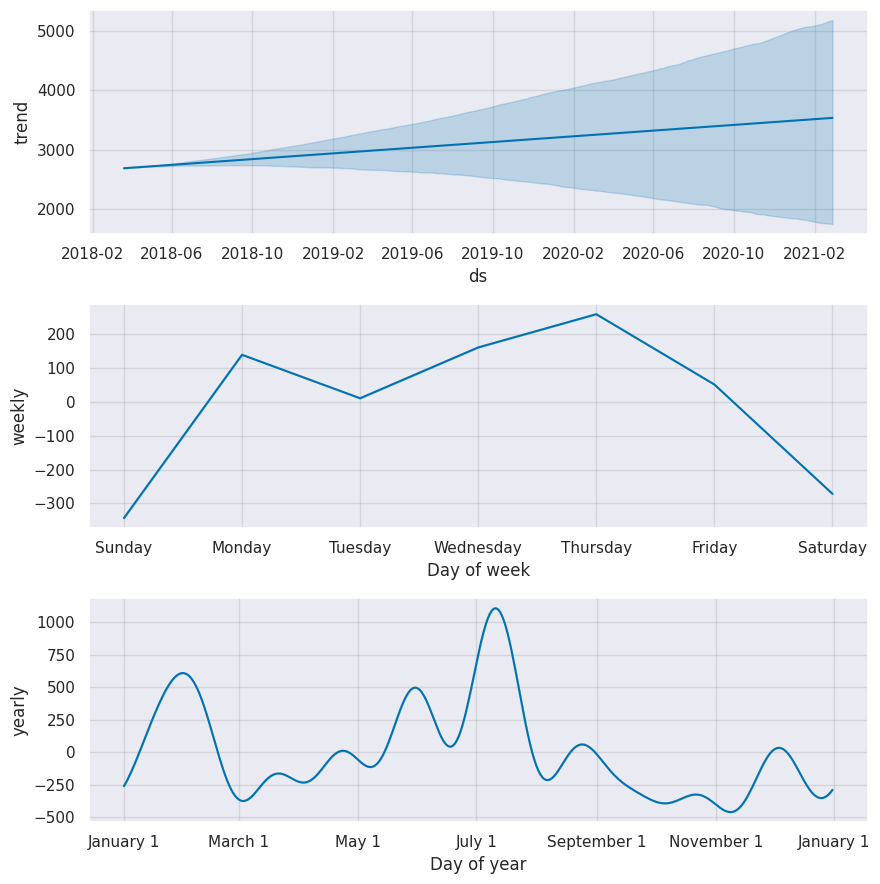

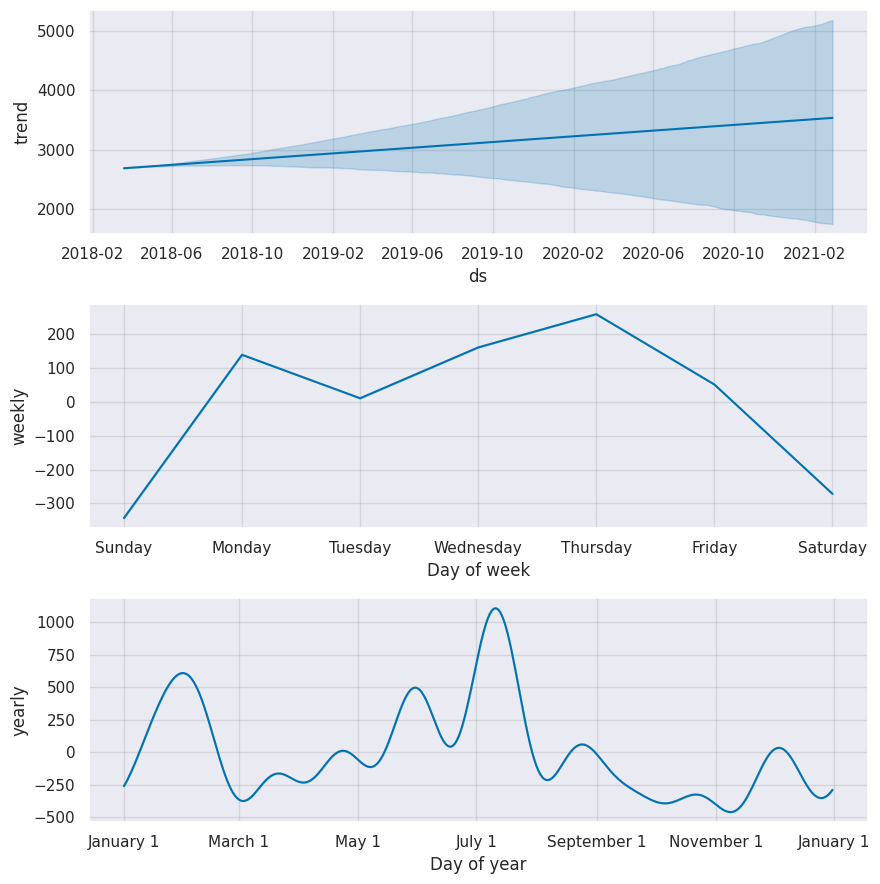

In [41]:
#If you plot the components from the forecasted model, what month of the yearly seasonality has the highest value?
model.plot_components(forecast)

In [42]:
#calling the original df that no column was dropped
df

,Tmax,SysLoad,GasPrice,ElecPrice
FullDate,,,,
2010-09-01 00:00:00,15.8,1688.21500,3.6900,23.710
2010-09-01 01:00:00,15.8,1669.19500,3.6900,22.635
2010-09-01 02:00:00,15.8,1491.98000,3.6900,22.565
2010-09-01 03:00:00,15.8,1330.76000,3.6900,18.910
2010-09-01 04:00:00,15.8,1247.94000,3.6900,18.030
...,...,...,...,...
2021-02-28 19:00:00,24.3,449.63625,5.4848,117.925
2021-02-28 20:00:00,24.3,815.59975,5.4848,87.880
2021-02-28 21:00:00,24.3,745.12325,5.4848,62.060


In [43]:
#resampling from hourly rate to daily rate
df_daily = df.resample('D').sum()
df_daily

,Tmax,SysLoad,GasPrice,ElecPrice
FullDate,,,,
2010-09-01,379.2,41565.38000,88.5600,2751.700
2010-09-02,369.6,38898.99000,88.5600,570.810
2010-09-03,439.2,41665.76000,106.8000,504.975
2010-09-04,328.8,35638.08500,81.3600,502.275
2010-09-05,357.6,35611.41000,106.8000,500.555
...,...,...,...,...
2021-02-24,537.6,-1525.49745,134.4000,634.770
2021-02-25,518.4,4539.07855,130.5048,577.515
2021-02-26,547.2,9517.02430,130.1808,1445.495


In [44]:
df_daily.reset_index(inplace=True)
df_daily.rename(columns={'FullDate': 'ds', 'ElecPrice': 'y'}, inplace=True)


In [45]:
#adding regressors
df_daily['add1'] = df_daily['SysLoad']
df_daily['add2'] = df_daily['Tmax']
df_daily['add3'] = df_daily['GasPrice']


In [46]:
# Split the data into a train and test set, naming it train2 and test2
train2 = df_daily[0:2757]
test2 = df_daily[2757:]

In [47]:
model2 = Prophet()
model2.add_regressor('add1', standardize=False)
model2.add_regressor('add2', standardize=False)
model2.add_regressor('add3', standardize=False)

model2.fit(train2)


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpt0sgzjzd/_a2lzg1g.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpt0sgzjzd/1hh4pg1n.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=56542', 'data', 'file=/tmp/tmpt0sgzjzd/_a2lzg1g.json', 'init=/tmp/tmpt0sgzjzd/1hh4pg1n.json', 'output', 'file=/tmp/tmpt0sgzjzd/prophet_model8vbkt8p_/prophet_model-20230727183355.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:33:56 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:33:56 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
18:33:56 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
ERROR:cmdstanpy:Chain [1] error: error during 

In [48]:
test2

,ds,Tmax,SysLoad,GasPrice,y,add1,add2,add3
2757,2018-03-20,540.0,7696.91130,201.5880,1833.000,7696.91130,540.0,201.5880
2758,2018-03-21,571.2,4658.05865,203.2560,1730.490,4658.05865,571.2,203.2560
2759,2018-03-22,722.4,19161.78525,203.2560,2260.550,19161.78525,722.4,203.2560
2760,2018-03-23,811.2,18090.43435,198.6456,2138.760,18090.43435,811.2,198.6456
2761,2018-03-24,832.8,3763.53865,180.2160,1721.700,3763.53865,832.8,180.2160
...,...,...,...,...,...,...,...,...
3829,2021-02-24,537.6,-1525.49745,134.4000,634.770,-1525.49745,537.6,134.4000
3830,2021-02-25,518.4,4539.07855,130.5048,577.515,4539.07855,518.4,130.5048
3831,2021-02-26,547.2,9517.02430,130.1808,1445.495,9517.02430,547.2,130.1808
3832,2021-02-27,564.0,4932.88015,130.0800,488.980,4932.88015,564.0,130.0800


In [49]:
#creating a datatframe
test_date2 = pd.DataFrame(test2['ds'])
test_date2

,ds
2757,2018-03-20
2758,2018-03-21
2759,2018-03-22
2760,2018-03-23
2761,2018-03-24
...,...
3829,2021-02-24
3830,2021-02-25
3831,2021-02-26
3832,2021-02-27


In [50]:
# Add regressor values for the test set
test_date2['add1'] = test2['add1']
test_date2['add2'] = test2['add2']
test_date2['add3'] = test2['add3']

# Make predictions for the test set
forecast2 = model2.predict(test_date2)
forecast2




,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,add1,add1_lower,add1_upper,add2,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2018-03-20,-1254.293478,-338.642266,4164.443986,-1254.293478,-1254.293478,433.817145,433.817145,433.817145,-0.046572,...,-84.935516,-84.935516,-84.935516,-43.546221,-43.546221,-43.546221,0.0,0.0,0.0,1974.445686
1,2018-03-21,-1253.618891,-367.289993,4250.372716,-1253.618891,-1253.618891,262.539819,262.539819,262.539819,-0.049263,...,42.669281,42.669281,42.669281,-34.382239,-34.382239,-34.382239,0.0,0.0,0.0,1964.798548
2,2018-03-22,-1252.944303,681.838544,4914.179255,-1252.944303,-1252.944303,1080.006075,1080.006075,1080.006075,-0.062303,...,145.199903,145.199903,145.199903,-29.474497,-29.474497,-29.474497,0.0,0.0,0.0,2890.364715
3,2018-03-23,-1252.269716,308.298301,4653.291026,-1252.269716,-1252.269716,1019.622062,1019.622062,1019.622062,-0.069962,...,-44.714338,-44.714338,-44.714338,-28.677891,-28.677891,-28.677891,0.0,0.0,0.0,2574.669491
4,2018-03-24,-1251.595128,-544.627182,3685.623811,-1251.595128,-1251.595128,212.122438,212.122438,212.122438,-0.071825,...,-117.045121,-117.045121,-117.045121,-31.738017,-31.738017,-31.738017,0.0,0.0,0.0,1425.183689
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1072,2021-02-24,-531.135611,-1279.735519,3329.517537,-1566.670108,468.790280,-85.980846,-85.980846,-85.980846,-0.046365,...,42.669281,42.669281,42.669281,-438.966040,-438.966040,-438.966040,0.0,0.0,0.0,935.623320
1073,2021-02-25,-530.461024,-1361.047944,3843.275210,-1567.347419,471.065401,255.833804,255.833804,255.833804,-0.044709,...,145.199903,145.199903,145.199903,-465.361755,-465.361755,-465.361755,0.0,0.0,0.0,1297.760522
1074,2021-02-26,-529.786436,-1119.016390,3961.248591,-1568.024729,473.274741,536.403259,536.403259,536.403259,-0.047193,...,-44.714338,-44.714338,-44.714338,-485.963557,-485.963557,-485.963557,0.0,0.0,0.0,1363.787356
1075,2021-02-27,-529.111849,-1342.331760,3606.389904,-1568.702040,475.145044,278.029446,278.029446,278.029446,-0.048642,...,-117.045121,-117.045121,-117.045121,-500.536922,-500.536922,-500.536922,0.0,0.0,0.0,1017.720721


In [51]:
# Extract the forecasted values from the forecast DataFrame
forecasted_prices2 = forecast2[['ds', 'yhat']]

print(forecasted_prices2)

             ds         yhat
0    2018-03-20  1974.445686
1    2018-03-21  1964.798548
2    2018-03-22  2890.364715
3    2018-03-23  2574.669491
4    2018-03-24  1425.183689
...         ...          ...
1072 2021-02-24   935.623320
1073 2021-02-25  1297.760522
1074 2021-02-26  1363.787356
1075 2021-02-27  1017.720721
1076 2021-02-28  1179.182511

[1077 rows x 2 columns]


In [52]:
merged_df2 = pd.merge(forecasted_prices2, test2, on='ds', how='inner')
merged_df2


,ds,yhat,Tmax,SysLoad,GasPrice,y,add1,add2,add3
0,2018-03-20,1974.445686,540.0,7696.91130,201.5880,1833.000,7696.91130,540.0,201.5880
1,2018-03-21,1964.798548,571.2,4658.05865,203.2560,1730.490,4658.05865,571.2,203.2560
2,2018-03-22,2890.364715,722.4,19161.78525,203.2560,2260.550,19161.78525,722.4,203.2560
3,2018-03-23,2574.669491,811.2,18090.43435,198.6456,2138.760,18090.43435,811.2,198.6456
4,2018-03-24,1425.183689,832.8,3763.53865,180.2160,1721.700,3763.53865,832.8,180.2160
...,...,...,...,...,...,...,...,...,...
1072,2021-02-24,935.623320,537.6,-1525.49745,134.4000,634.770,-1525.49745,537.6,134.4000
1073,2021-02-25,1297.760522,518.4,4539.07855,130.5048,577.515,4539.07855,518.4,130.5048
1074,2021-02-26,1363.787356,547.2,9517.02430,130.1808,1445.495,9517.02430,547.2,130.1808
1075,2021-02-27,1017.720721,564.0,4932.88015,130.0800,488.980,4932.88015,564.0,130.0800


In [53]:
# Evaluating the results of your time series model on the test set, what is the MAPE (in %) in 2 decimal places?
mape = (abs((merged_df2['y'] - merged_df2['yhat']) / merged_df2['y'])).mean() * 100
print("MAPE: {:.2f}%".format(mape))


MAPE: 229.12%


In [54]:
#What is the RMSE in 2 decimal places?
rmse = np.sqrt(((merged_df2['y'] - merged_df2['yhat']) ** 2).mean())
print("RSME: {:.2f}".format(rmse))

RSME: 2704.50


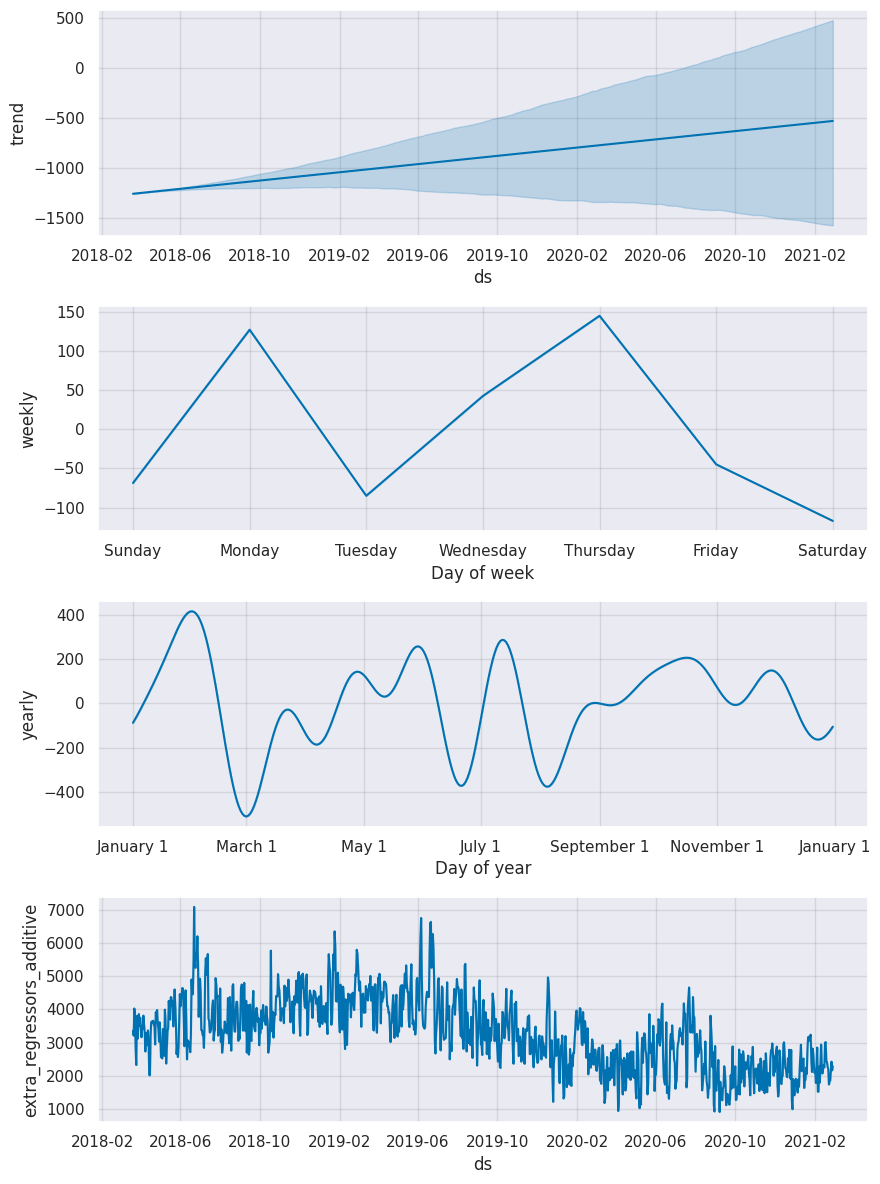

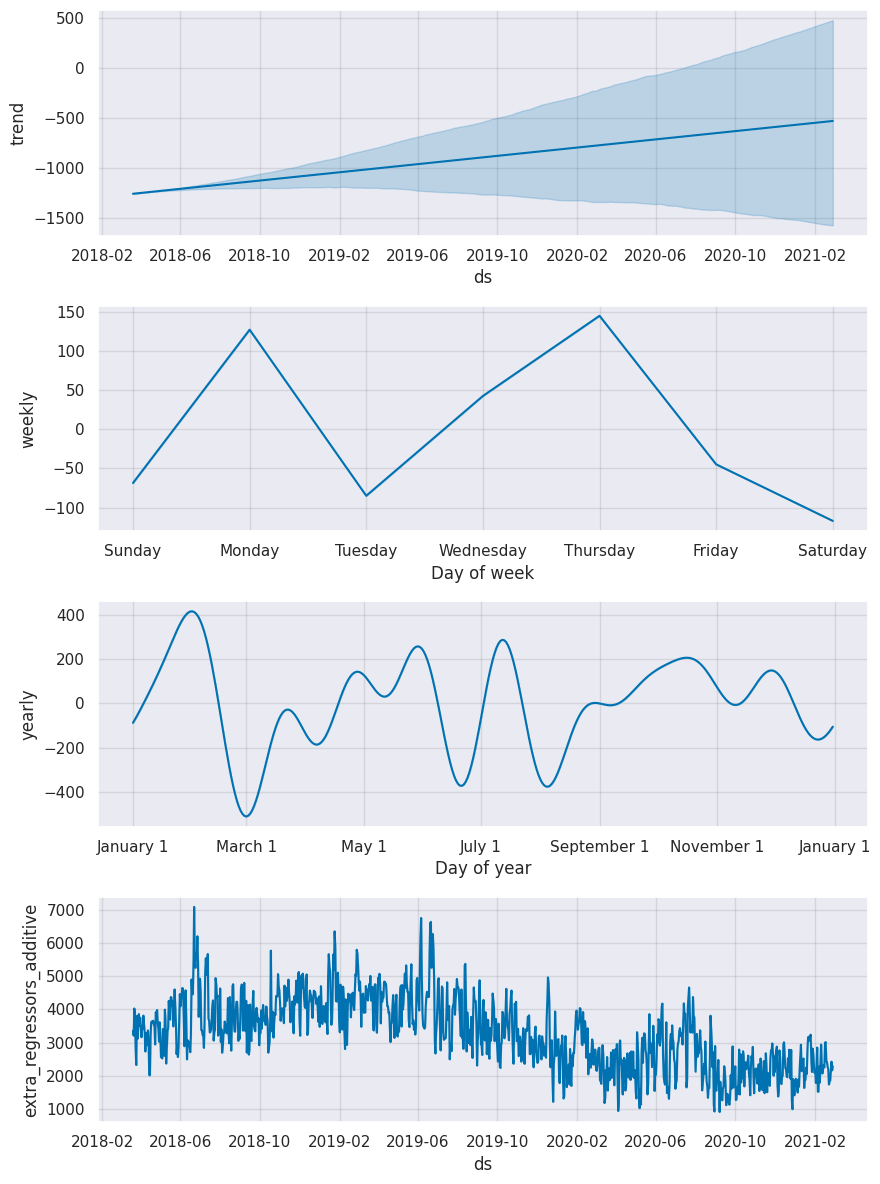

In [55]:
#If you plot the components from the multivariate forecasted model, what day of the daily seasonality has the highest value?
model2.plot_components(forecast2)

In [56]:
#creating a variable to answer question 20 by dropping tmax
df2 = df.drop(columns = 'Tmax')
df2

,SysLoad,GasPrice,ElecPrice
FullDate,,,
2010-09-01 00:00:00,1688.21500,3.6900,23.710
2010-09-01 01:00:00,1669.19500,3.6900,22.635
2010-09-01 02:00:00,1491.98000,3.6900,22.565
2010-09-01 03:00:00,1330.76000,3.6900,18.910
2010-09-01 04:00:00,1247.94000,3.6900,18.030
...,...,...,...
2021-02-28 19:00:00,449.63625,5.4848,117.925
2021-02-28 20:00:00,815.59975,5.4848,87.880
2021-02-28 21:00:00,745.12325,5.4848,62.060


In [57]:
#resampling
df2_daily = df2.resample('D').sum()
df2_daily

,SysLoad,GasPrice,ElecPrice
FullDate,,,
2010-09-01,41565.38000,88.5600,2751.700
2010-09-02,38898.99000,88.5600,570.810
2010-09-03,41665.76000,106.8000,504.975
2010-09-04,35638.08500,81.3600,502.275
2010-09-05,35611.41000,106.8000,500.555
...,...,...,...
2021-02-24,-1525.49745,134.4000,634.770
2021-02-25,4539.07855,130.5048,577.515
2021-02-26,9517.02430,130.1808,1445.495


In [58]:
df2_daily.reset_index(inplace=True)
df2_daily.rename(columns={'FullDate': 'ds', 'ElecPrice': 'y'}, inplace=True)

In [59]:
df2_daily['add1'] = df2_daily['SysLoad']
df2_daily['add2'] = df2_daily['GasPrice']

In [60]:
#naming the variable train3, test3
train3 = df2_daily[0:2757]
test3 = df2_daily[2757:]

In [61]:
model3 = Prophet()
model3.add_regressor('add1', standardize= False)
model3.add_regressor('add2', standardize= False)
model3.fit(train3)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpt0sgzjzd/hoc9lai_.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpt0sgzjzd/igvny0zt.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=28441', 'data', 'file=/tmp/tmpt0sgzjzd/hoc9lai_.json', 'init=/tmp/tmpt0sgzjzd/igvny0zt.json', 'output', 'file=/tmp/tmpt0sgzjzd/prophet_modelytvn7s1w/prophet_model-20230727183431.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:34:31 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:34:31 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [62]:
test3

,ds,SysLoad,GasPrice,y,add1,add2
2757,2018-03-20,7696.91130,201.5880,1833.000,7696.91130,201.5880
2758,2018-03-21,4658.05865,203.2560,1730.490,4658.05865,203.2560
2759,2018-03-22,19161.78525,203.2560,2260.550,19161.78525,203.2560
2760,2018-03-23,18090.43435,198.6456,2138.760,18090.43435,198.6456
2761,2018-03-24,3763.53865,180.2160,1721.700,3763.53865,180.2160
...,...,...,...,...,...,...
3829,2021-02-24,-1525.49745,134.4000,634.770,-1525.49745,134.4000
3830,2021-02-25,4539.07855,130.5048,577.515,4539.07855,130.5048
3831,2021-02-26,9517.02430,130.1808,1445.495,9517.02430,130.1808
3832,2021-02-27,4932.88015,130.0800,488.980,4932.88015,130.0800


In [63]:
test_dates3 = pd.DataFrame(test3['ds'])
test_dates3['add1'] = test3['add1']
test_dates3['add2'] = test3['add2']

#predict
forecast3 = model3.predict(test_dates3)

In [64]:
forecasted_prices3 = forecast3[['ds','yhat']]
print(forecasted_prices3)

             ds         yhat
0    2018-03-20  1534.271324
1    2018-03-21  1936.606410
2    2018-03-22  1455.642739
3    2018-03-23  1028.608062
4    2018-03-24   376.774220
...         ...          ...
1072 2021-02-24  -881.666330
1073 2021-02-25 -1158.286092
1074 2021-02-26 -1771.985088
1075 2021-02-27 -2304.480652
1076 2021-02-28 -2582.988115

[1077 rows x 2 columns]


In [65]:
merged_df3 = pd.merge(forecasted_prices3,test3, on='ds',how = 'inner')
merged_df3

,ds,yhat,SysLoad,GasPrice,y,add1,add2
0,2018-03-20,1534.271324,7696.91130,201.5880,1833.000,7696.91130,201.5880
1,2018-03-21,1936.606410,4658.05865,203.2560,1730.490,4658.05865,203.2560
2,2018-03-22,1455.642739,19161.78525,203.2560,2260.550,19161.78525,203.2560
3,2018-03-23,1028.608062,18090.43435,198.6456,2138.760,18090.43435,198.6456
4,2018-03-24,376.774220,3763.53865,180.2160,1721.700,3763.53865,180.2160
...,...,...,...,...,...,...,...
1072,2021-02-24,-881.666330,-1525.49745,134.4000,634.770,-1525.49745,134.4000
1073,2021-02-25,-1158.286092,4539.07855,130.5048,577.515,4539.07855,130.5048
1074,2021-02-26,-1771.985088,9517.02430,130.1808,1445.495,9517.02430,130.1808
1075,2021-02-27,-2304.480652,4932.88015,130.0800,488.980,4932.88015,130.0800


In [66]:
#Train a multivariate time series model performing the same train test split as before, but now exclude T-max from the training data(drop T-max),
#What is the mean absolute percentage error (MAPE) to 2 decimal places on the test set?
mape = (abs((merged_df3['y'] - merged_df3['yhat']) / merged_df3['y'])).mean() * 100
print("MAPE: {:.2f}%".format(mape))

MAPE: 257.82%
